In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
defPt    = np.load(r'/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/trace_20000/2022.03.25-06.05.29_textin.npy')
defTrace = np.load(r'/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/trace_20000/2022.03.25-06.05.29_traces.npy')
#atkPt    = np.load(r'/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/trace_10000/2022.03.25-05.40.47_textin.npy')
#atkTrace = np.load(r'/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/trace_10000/2022.03.25-05.40.47_traces.npy')

In [3]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16 )

MK = ( 0x01, 0x23, 0x45, 0x67, 0x89, 0xab, 0xcd, 0xef, 0x12, 0x34, 0x56, 0x78, 0x9a, 0xbc, 0xde, 0xf0 )

iv = np.zeros(len(defTrace))
for i in range(len(defTrace)):
#    temp = sbox[defPt[i][0] ^ MK[0]]
    temp = defPt[i][0]
    for j in range(8):
        iv[i] += (temp >> j) & 1

np.save('/Users/louxsoen/Documents/Univ/부채널연구/Traces/AES/ivin.npy', iv)

x_train, x_test = train_test_split(defTrace, test_size = 0.2, shuffle = False)
y_train, y_test = train_test_split(iv , test_size = 0.2, shuffle = False)

In [4]:
print("x train |", x_train.shape)
print("x test  |", x_test.shape)
print("y train |", y_train.shape)
print("y test  |", y_test.shape)
print("trNum   |", len(defTrace))

x train | (16000, 24000)
x test  | (4000, 24000)
y train | (16000,)
y test  | (4000,)
trNum   | 20000


In [5]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(units = 128, name = 'Input', activation = 'relu', input_dim = x_train.shape[1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate= 0.2),
    
    tf.keras.layers.Dense(units = 128, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate= 0.2),
    
    tf.keras.layers.Dense(units = 64, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate= 0.2),
    
    tf.keras.layers.Dense(units = 32, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate= 0.2),
    
    tf.keras.layers.Dense(units = 16, activation = 'relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate= 0.2),
    
    tf.keras.layers.Dense(units = 9, activation = 'softmax', kernel_initializer='he_normal')    
])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics =["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               3072128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

2022-03-28 21:37:00.165520: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
history = model.fit(x_train, y_train, epochs = 45, verbose = 1)

Epoch 1/45
500/500 [==============================] - 8s 14ms/step - loss: 2.3181 - accuracy: 0.1831
Epoch 2/45
500/500 [==============================] - 7s 14ms/step - loss: 1.8515 - accuracy: 0.2511
Epoch 3/45
500/500 [==============================] - 7s 14ms/step - loss: 1.6594 - accuracy: 0.3094
Epoch 4/45
500/500 [==============================] - 7s 13ms/step - loss: 1.3227 - accuracy: 0.4306
Epoch 5/45
500/500 [==============================] - 7s 14ms/step - loss: 1.1249 - accuracy: 0.5041
Epoch 6/45
500/500 [==============================] - 7s 14ms/step - loss: 1.0579 - accuracy: 0.5428
Epoch 7/45
500/500 [==============================] - 7s 14ms/step - loss: 0.9720 - accuracy: 0.5771
Epoch 8/45
500/500 [==============================] - 7s 13ms/step - loss: 0.8906 - accuracy: 0.6192
Epoch 9/45
500/500 [==============================] - 7s 13ms/step - loss: 0.8540 - accuracy: 0.6342
Epoch 10/45
500/500 [==============================] - 7s 14ms/step - loss: 0.8464 - accura

In [7]:
predictions = model.predict(x_test)

print(y_test)
print(np.argmax(predictions[:10], axis = 1))

[4. 6. 5. ... 4. 4. 3.]
[4 6 6 2 2 2 6 2 7 6]


dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

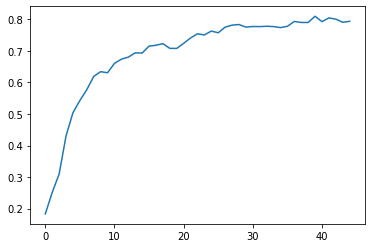

In [8]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

output_layer_result = model.predict(x_train)
output_test_result = model.evaluate(x_test, y_test, verbose=0)
print('test model |      Loss :', output_test_result[0])
print('           | Accuaracy :', output_test_result[1])

print('\n-------- Outputs of Output Layer -------\n')
print(output_layer_result[0])